# 🔍 YOLOv11 기반 이미지 검출 실습

🍎🍌 사과 & 바나나 객체 탐지 예제 데이터셋

Roboflow Universe에서 제공하는 fruits-apple-banana 데이터셋은 사과와 바나나를 포함한 1,000장의 이미지와 주석이 포함된 공개 데이터셋입니다.

📁 데이터셋 구성

- 이미지 수: 1,000장
- 클래스: 사과(apple), 바나나(banana)
- 형식: YOLOv8, COCO JSON 등 다양한 포맷으로 다운로드 가능
- 데이터 분할:
    - 훈련(Train): 76%
    - 검증(Validation): 18%
    - 테스트(Test): 6%

🔽 데이터셋 다운로드 및 사용 방법

1. Roboflow 계정 생성 및 로그인
    - Roboflow에 접속하여 무료 계정을 생성하고 로그인합니다.

2. 데이터셋 페이지로 이동
    - fruits-apple-banana 데이터셋 페이지로 이동합니다.

3. 데이터셋 다운로드
    - Download Dataset 버튼을 클릭합니다.

    - 원하는 포맷을 선택합니다:
        - YOLOv11
        - COCO JSON
        - Pascal VOC XML
        - TFRecord
        - 기타

    - Download 버튼을 클릭하여 ZIP 파일을 다운로드합니다.

4. 데이터셋 압축 해제
    - 다운로드한 ZIP 파일을 원하는 디렉토리에 압축 해제합니다.

5. YOLOv11 모델 학습
    - Ultralytics의 YOLOv11을 사용하여 모델을 학습할 수 있습니다.

In [1]:
# ✅ 필수 라이브러리 설치
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
# 📦 YOLOv11 불러오기 및 예측 테스트 (사전 학습 모델)
from ultralytics import YOLO
model = YOLO("yolo11n.pt")
results = model('https://ultralytics.com/images/bus.jpg', show=True)
results

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 347MB/s]

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



100%|██████████| 134k/134k [00:00<00:00, 34.1MB/s]


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 60.3ms
Speed: 21.3ms preprocess, 60.3ms inference, 366.0ms postprocess per image at shape (1, 3, 640, 480)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [3]:
!curl -L "https://universe.roboflow.com/ds/pyRSTdNF9w?key=9fmDB9Q8vC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   2500      0 --:--:-- --:--:-- --:--:--  2502
100 56.7M  100 56.7M    0     0  8163k      0  0:00:07  0:00:07 --:--:-- 12.3M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/rgb_115_png.rf.297664276a6dd9f5414ffe5199a09698.jpg  
 extracting: test/images/rgb_119_png.rf.23ee609e48a33a9ae846d80a4b9c5569.jpg  
 extracting: test/images/rgb_124_png.rf.a2965908db21b6ed3fc023d53cf099ef.jpg  
 extracting: test/images/rgb_125_png.rf.4d28bba6737e23af3ae3fb4722920cc1.jpg  
 extracting: test/images/rgb_127_png.rf.3852418d07f69db0c25be5cb0a396519.jpg  
 extracting: test/images/rgb_131_png.rf.c4023a79d583f1ac5a613b2d647b5398.jpg  
 extracting: test/images/rgb

## 🏋️ 전이 학습을 통한 사용자 정의 모델 학습

In [5]:
# 전이 학습 시작
model = YOLO("yolo11n.pt")
model.train(data='data.yaml', epochs=5, imgsz=640, batch=8, name='detection')

Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

train: Scanning /content/train/labels.cache... 700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 700/700 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 532.3±124.8 MB/s, size: 64.9 KB)


val: Scanning /content/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]


Plotting labels to runs/detect/detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/detection
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.46G     0.7342      2.403     0.9652        292        640: 100%|██████████| 88/88 [00:09<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.30it/s]


                   all        200      13611      0.986      0.847      0.933        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.81G     0.6166     0.7894     0.9071        257        640: 100%|██████████| 88/88 [00:08<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.81it/s]

                   all        200      13611      0.957      0.951      0.964      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      3.14G     0.5622     0.5848     0.8902        197        640: 100%|██████████| 88/88 [00:08<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.73it/s]

                   all        200      13611      0.982      0.952      0.972      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      3.14G     0.5315     0.5369     0.8753        635        640: 100%|██████████| 88/88 [00:08<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.78it/s]

                   all        200      13611      0.986      0.954      0.975      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      3.49G     0.5061     0.5072      0.871        352        640: 100%|██████████| 88/88 [00:08<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.70it/s]

                   all        200      13611      0.987      0.956      0.977      0.916



5 epochs completed in 0.015 hours.
Optimizer stripped from runs/detect/detection/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/detection/weights/best.pt, 5.5MB

Validating runs/detect/detection/weights/best.pt...
Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]


                   all        200      13611      0.987      0.956      0.977      0.916
        ycb_011_banana        200       6999      0.978      0.941      0.968      0.877
         ycb_013_apple        200       6612      0.996      0.971      0.985      0.955
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/detection


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79a8a6886390>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## 🔎 학습된 모델로 테스트

In [6]:
# 모델 불러오기 및 예측
model = YOLO('/content/runs/detect/detection/weights/best.pt')
results = model('/content/test/images/rgb_115_png.rf.297664276a6dd9f5414ffe5199a09698.jpg', save=True, show=True)
results


image 1/1 /content/test/images/rgb_115_png.rf.297664276a6dd9f5414ffe5199a09698.jpg: 640x640 23 ycb_011_bananas, 12 ycb_013_apples, 12.4ms
Speed: 2.5ms preprocess, 12.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'ycb_011_banana', 1: 'ycb_013_apple'}
 obb: None
 orig_img: array([[[207, 247, 245],
         [216, 253, 251],
         [226, 255, 255],
         ...,
         [225, 250, 254],
         [223, 251, 252],
         [222, 250, 251]],
 
        [[207, 247, 245],
         [216, 253, 251],
         [226, 255, 255],
         ...,
         [217, 252, 255],
         [216, 254, 255],
         [216, 254, 255]],
 
        [[207, 247, 245],
         [216, 253, 251],
         [226, 255, 255],
         ...,
         [199, 252, 255],
         [197, 252, 255],
         [196, 253, 255]],
 
        ...,
 
        [[ 82,  98, 105],
         [ 82,  98, 105],
         [ 83,  99, 106],
         ...,
         [ 65, 255, 250],
         [ 65, 255, 252],
         [ 67, 255, 252]],
 
        [[ 82,  98, 105],
         [ 82,  98, 105],
         [ 83,  99, 106],
    

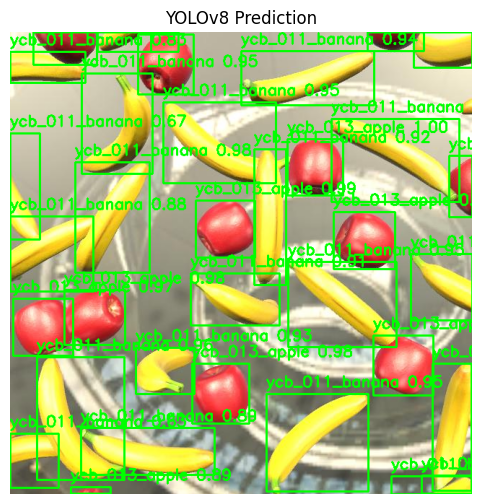

In [7]:
import cv2
import matplotlib.pyplot as plt

# 이미지 불러오기
img_path = "/content/test/images/rgb_115_png.rf.297664276a6dd9f5414ffe5199a09698.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 결과 정보 얻기
boxes = results[0].boxes
annotated = img_rgb.copy()

# 시각화 (Matplotlib 사용)
for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    label = model.names[cls_id]

    # 박스 그리기
    cv2.rectangle(annotated, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # 라벨 그리기
    text = f"{label} {conf:.2f}"
    cv2.putText(annotated, text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# 6. 출력
plt.figure(figsize=(10, 6))
plt.imshow(annotated)
plt.axis("off")
plt.title("YOLOv8 Prediction")
plt.show()